In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.labelsize': 14, 'figure.titlesize': 16, 
                     'axes.labelsize': 14, 'axes.titlesize': 16, 
                     'xtick.labelsize': 12, 'ytick.labelsize': 12, 'legend.fontsize': 12})

In [2]:
summary_df = pd.read_csv('summary.csv', index_col=0)
summary_df['Gap(CGSP-CGMP)'] = summary_df['ObjVal(CGSP)'] - summary_df['ObjVal(CGMP)']
summary_df['Gap(CGSP-CGMPSub)'] = summary_df['ObjVal(CGSP)'] - summary_df['ObjVal(CGMPSub)']
summary_df['Gap(CGMP-CGMPSub)'] = summary_df['ObjVal(CGMP)'] - summary_df['ObjVal(CGMPSub)']

summary_df['TimeGap(GB-CGSP)'] = summary_df['Time(GB)'] - summary_df['Time(CGSP)']
summary_df['TimeGap(GB-CGMP)'] = summary_df['Time(GB)'] - summary_df['Time(CGMP)']
summary_df['TimeGap(GB-CGMPSub)'] = summary_df['Time(GB)'] - summary_df['Time(CGMPSub)']

summary_df['TimeGap(CGSP-CGMP)'] = summary_df['Time(CGSP)'] - summary_df['Time(CGMP)']
summary_df['TimeGap(CGSP-CGMPSub)'] = summary_df['Time(CGSP)'] - summary_df['Time(CGMPSub)']
summary_df['TimeGap(CGMP-CGMPSub)'] = summary_df['Time(CGMP)'] - summary_df['Time(CGMPSub)']

summary_df.head()

,N,M,ObjVal(GB),ObjVal(CGSP),ObjVal(CGMP),ObjVal(CGMPSub),nCols(GB),nCols(CGSP),nCols(CGMP),nCols(CGMPSub),...,Gap(GB-CGMPSub),Gap(CGSP-CGMP),Gap(CGSP-CGMPSub),Gap(CGMP-CGMPSub),TimeGap(GB-CGSP),TimeGap(GB-CGMP),TimeGap(GB-CGMPSub),TimeGap(CGSP-CGMP),TimeGap(CGSP-CGMPSub),TimeGap(CGMP-CGMPSub)
Instance,,,,,,,,,,,,,,,,,,,,,
1,2,2,0.0000,0.0000,0.0000,0.0000,6,4,10,4,...,0.000000e+00,0.0,0.0,0.0,-0.041852,-0.040752,-0.055518,0.001100,-0.013665,-0.014765
2,2,3,0.0001,0.0001,0.0001,0.0001,6,5,5,5,...,-1.110223e-16,0.0,0.0,0.0,-0.047642,-0.021150,-0.035462,0.026492,0.012180,-0.014312
3,2,4,0.0146,0.0146,0.0146,0.0146,6,5,10,5,...,0.000000e+00,0.0,0.0,0.0,-0.055543,-0.035817,-0.063288,0.019726,-0.007745,-0.027471
4,3,2,0.0001,0.0001,0.0001,0.0001,24,5,10,5,...,-5.551115e-17,0.0,0.0,0.0,-0.075911,-0.058659,-0.079229,0.017252,-0.003318,-0.020569
5,3,3,0.0001,0.0001,0.0001,0.0001,24,6,10,6,...,0.000000e+00,0.0,0.0,0.0,-0.248422,-0.085588,-0.083208,0.162834,0.165214,0.002381


In [3]:
# Average over instances of same size
summary_df = summary_df.groupby(['N', 'M']).mean().reset_index()
summary_df.index += 1
summary_df.head()

,N,M,ObjVal(GB),ObjVal(CGSP),ObjVal(CGMP),ObjVal(CGMPSub),nCols(GB),nCols(CGSP),nCols(CGMP),nCols(CGMPSub),...,Gap(GB-CGMPSub),Gap(CGSP-CGMP),Gap(CGSP-CGMPSub),Gap(CGMP-CGMPSub),TimeGap(GB-CGSP),TimeGap(GB-CGMP),TimeGap(GB-CGMPSub),TimeGap(CGSP-CGMP),TimeGap(CGSP-CGMPSub),TimeGap(CGMP-CGMPSub)
1,2,2,0.0000,0.0000,0.0000,0.0000,6.0,4.0,10.0,4.0,...,0.000000e+00,0.0,0.0,0.0,-0.041852,-0.040752,-0.055518,0.001100,-0.013665,-0.014765
2,2,3,0.0001,0.0001,0.0001,0.0001,6.0,5.0,5.0,5.0,...,-1.110223e-16,0.0,0.0,0.0,-0.047642,-0.021150,-0.035462,0.026492,0.012180,-0.014312
3,2,4,0.0146,0.0146,0.0146,0.0146,6.0,5.0,10.0,5.0,...,0.000000e+00,0.0,0.0,0.0,-0.055543,-0.035817,-0.063288,0.019726,-0.007745,-0.027471
4,3,2,0.0001,0.0001,0.0001,0.0001,24.0,5.0,10.0,5.0,...,-5.551115e-17,0.0,0.0,0.0,-0.075911,-0.058659,-0.079229,0.017252,-0.003318,-0.020569
5,3,3,0.0001,0.0001,0.0001,0.0001,24.0,6.0,10.0,6.0,...,0.000000e+00,0.0,0.0,0.0,-0.248422,-0.085588,-0.083208,0.162834,0.165214,0.002381


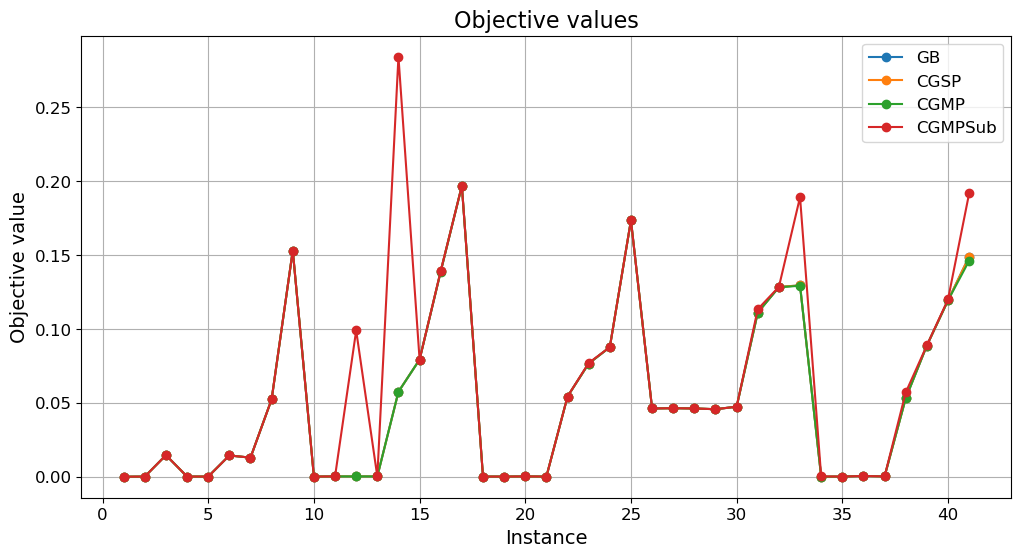

In [4]:
# Plot objective values
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(summary_df.index, summary_df['ObjVal(GB)'], marker='o', label='GB')
ax.plot(summary_df.index, summary_df['ObjVal(CGSP)'], marker='o', label='CGSP')
ax.plot(summary_df.index, summary_df['ObjVal(CGMP)'], marker='o', label='CGMP')
ax.plot(summary_df.index, summary_df['ObjVal(CGMPSub)'], marker='o', label='CGMPSub')
ax.set_title('Objective values')
ax.set_xlabel('Instance')
ax.set_ylabel('Objective value')
ax.legend(loc='upper right')
ax.grid()
plt.show()

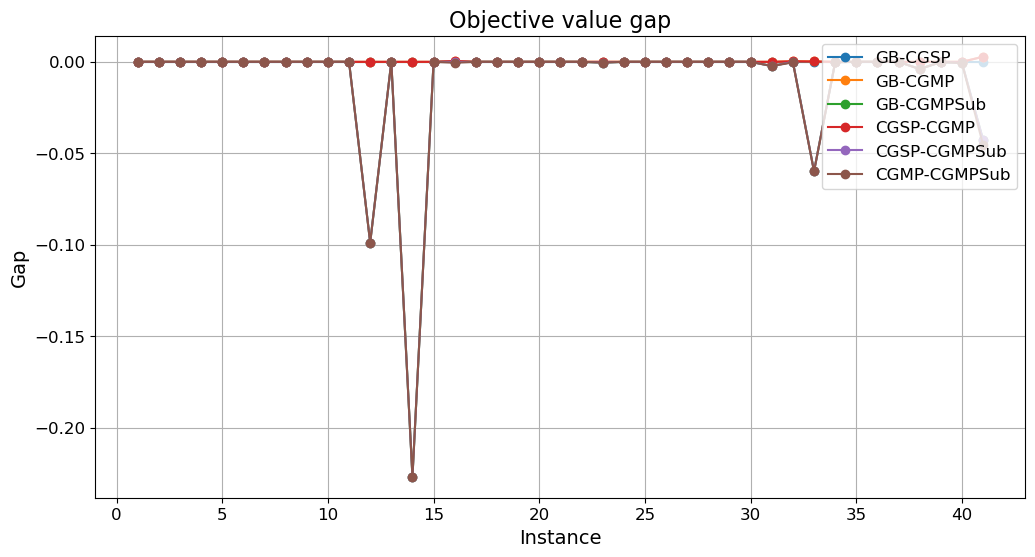

In [5]:
# Plot objective value gaps
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(summary_df.index, summary_df['Gap(GB-CGSP)'], marker='o', label='GB-CGSP')
ax.plot(summary_df.index, summary_df['Gap(GB-CGMP)'], marker='o', label='GB-CGMP')
ax.plot(summary_df.index, summary_df['Gap(GB-CGMPSub)'], marker='o', label='GB-CGMPSub')
ax.plot(summary_df.index, summary_df['Gap(CGSP-CGMP)'], marker='o', label='CGSP-CGMP')
ax.plot(summary_df.index, summary_df['Gap(CGSP-CGMPSub)'], marker='o', label='CGSP-CGMPSub')
ax.plot(summary_df.index, summary_df['Gap(CGMP-CGMPSub)'], marker='o', label='CGMP-CGMPSub')
ax.set_title('Objective value gap')
ax.set_xlabel('Instance')
ax.set_ylabel('Gap')
ax.legend(loc='upper right')
ax.grid()
plt.show()

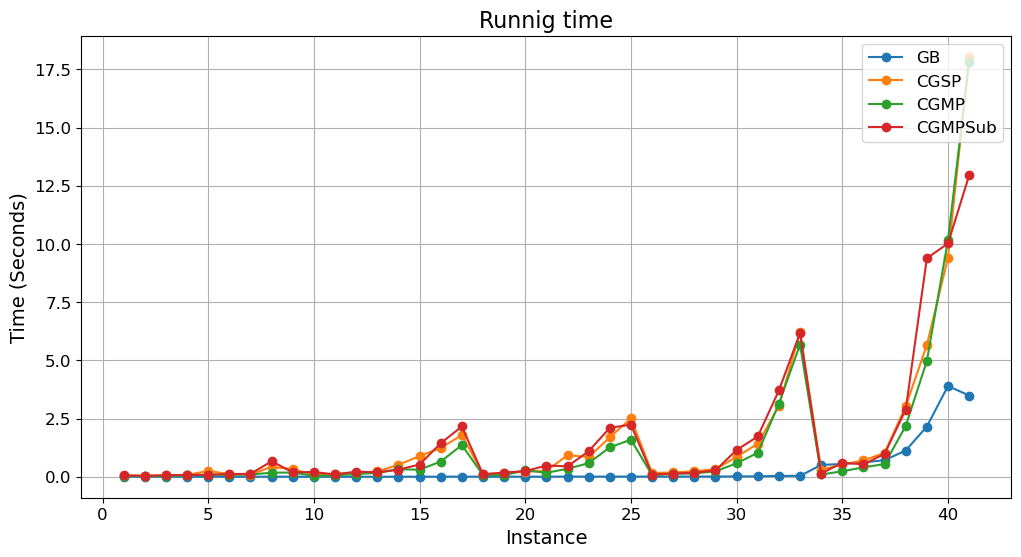

In [6]:
# Plot time
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(summary_df.index, summary_df['Time(GB)'], marker='o', label='GB')
ax.plot(summary_df.index, summary_df['Time(CGSP)'], marker='o', label='CGSP')
ax.plot(summary_df.index, summary_df['Time(CGMP)'], marker='o', label='CGMP')
ax.plot(summary_df.index, summary_df['Time(CGMPSub)'], marker='o', label='CGMPSub')
ax.set_title('Runnig time')
ax.set_xlabel('Instance')
ax.set_ylabel('Time (Seconds)')
ax.legend(loc='upper right')
ax.grid()
plt.show()

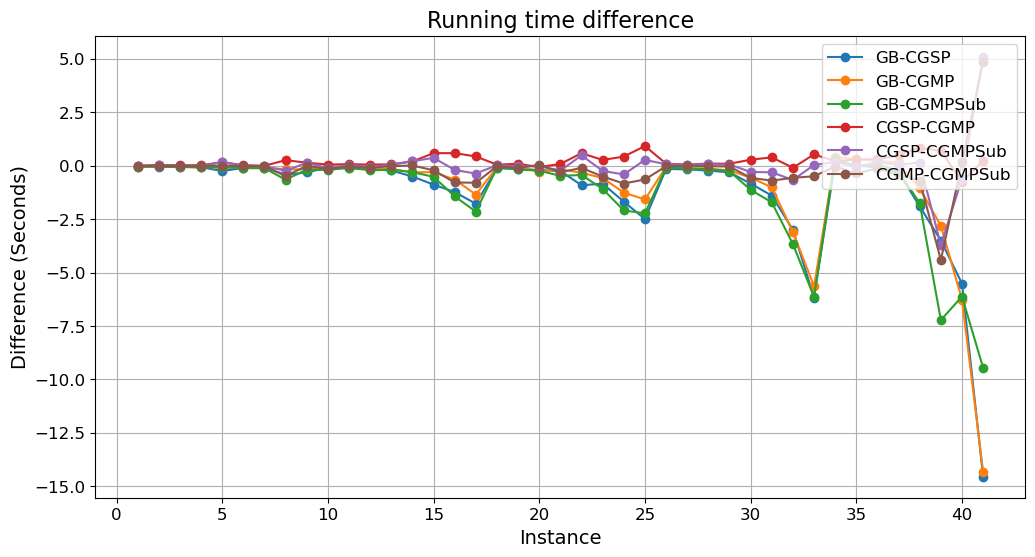

In [7]:
# Plot time difference
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(summary_df.index, summary_df['TimeGap(GB-CGSP)'], marker='o', label='GB-CGSP')
ax.plot(summary_df.index, summary_df['TimeGap(GB-CGMP)'], marker='o', label='GB-CGMP')
ax.plot(summary_df.index, summary_df['TimeGap(GB-CGMPSub)'], marker='o', label='GB-CGMPSub')
ax.plot(summary_df.index, summary_df['TimeGap(CGSP-CGMP)'], marker='o', label='CGSP-CGMP')
ax.plot(summary_df.index, summary_df['TimeGap(CGSP-CGMPSub)'], marker='o', label='CGSP-CGMPSub')
ax.plot(summary_df.index, summary_df['TimeGap(CGMP-CGMPSub)'], marker='o', label='CGMP-CGMPSub')
ax.set_title('Running time difference')
ax.set_xlabel('Instance')
ax.set_ylabel('Difference (Seconds)')
ax.legend(loc='upper right')
ax.grid()

plt.show()

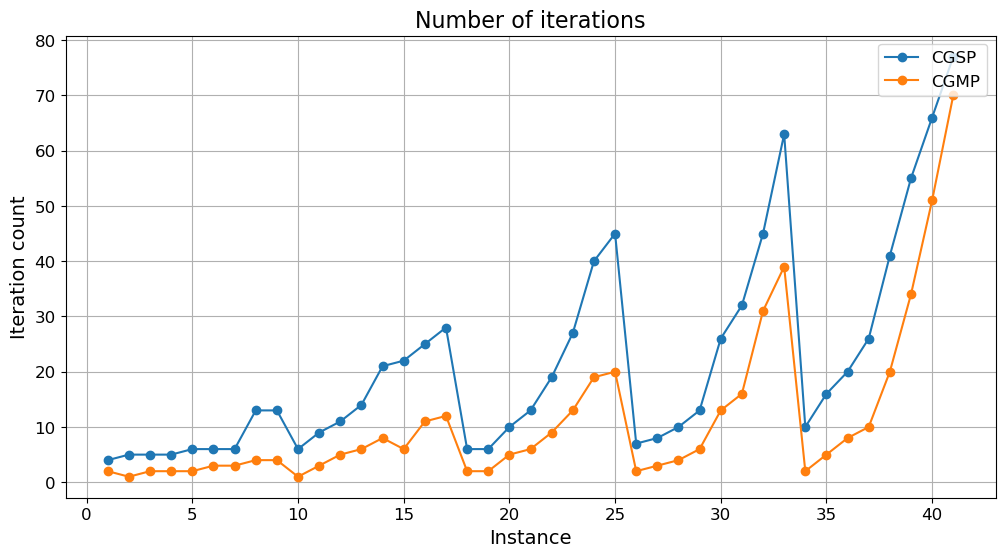

In [8]:
# Plot number of iterations
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(summary_df.index, summary_df['K(CGSP)'], marker='o', label='CGSP')
ax.plot(summary_df.index, summary_df['K(CGMP)'], marker='o', label='CGMP')
ax.set_title('Number of iterations')
ax.set_xlabel('Instance')
ax.set_ylabel('Iteration count')
ax.legend(loc='upper right')
ax.grid()
plt.show()

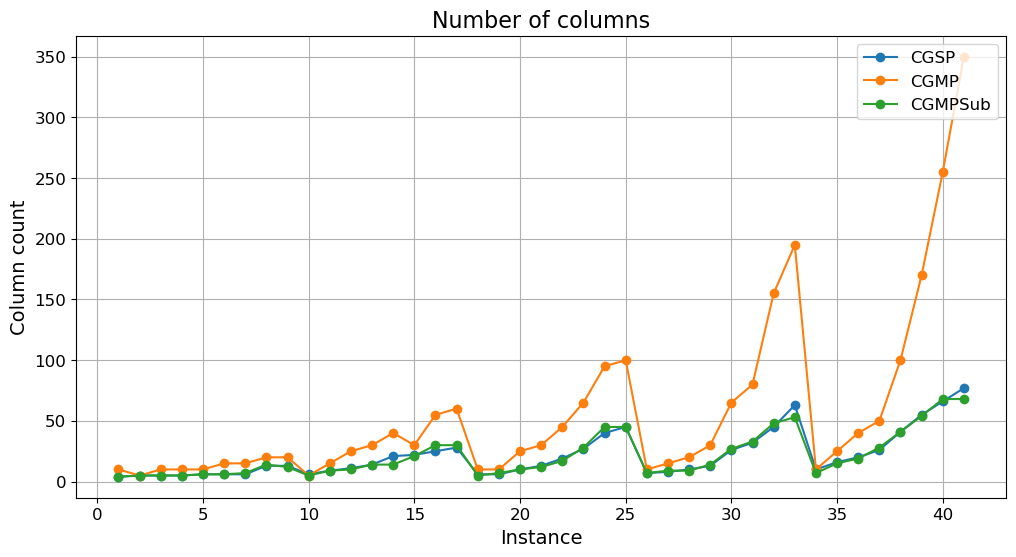

In [9]:
# Plot number of permutations/columns
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(summary_df.index, summary_df['nCols(CGSP)'], marker='o', label='CGSP')
ax.plot(summary_df.index, summary_df['nCols(CGMP)'], marker='o', label='CGMP')
ax.plot(summary_df.index, summary_df['nCols(CGMPSub)'], marker='o', label='CGMPSub')
ax.set_title('Number of columns')
ax.set_xlabel('Instance')
ax.set_ylabel('Column count')
ax.legend(loc='upper right')
ax.grid()
plt.show()